## setup environment and gather the survey responses

In [1]:
import matplotlib.pyplot as plt
import pandas
import requests
import re

In [2]:
survey_responses_url = 'https://curate.nd.edu/downloads/fn106w94g79'
original_responses = pandas.read_csv(survey_responses_url)
survey = original_responses.copy() # slice here to work with a smaller set

In [3]:
survey_questions_url = 'https://curate.nd.edu/downloads/0v838051f6x'
survey_questions = requests.get(survey_questions_url).text

## create a survey key and a method to retrieve responses as plaintext

In [4]:
survey_key = {}
question_regex = re.compile('^(v\d+)\\t(.*)')
answer_regex = re.compile('^\((\d+)\)\s(.*)')

for line in survey_questions.splitlines():
    line = line.strip()
    question = re.match(question_regex, line)
    answer = re.match(answer_regex, line)
    if question:
        question_id = question.group(1)
        question_text = question.group(2)
        survey_key[question_id] = { 'text': '', 'answers': {} }
        survey_key[question_id]['text'] = question_text
    elif answer:
        answer_id = answer.group(1)
        answer_text = answer.group(2)
        survey_key[question_id]['answers'][answer_id] = answer_text

In [5]:
def get_answer_text(answer, question):
    try:
        answer_id = str(int(answer))
        text = survey_key[question]['answers'][answer_id]
    except ValueError:
        return '- missing response -'
    except KeyError:
        return '- missing answer key -'
    else:
        return text

## find the 'Most Annoying Question' in the survey

In [6]:
def find_the_most_annoying_question():
    print('\nfinding the most annoying question. 🙄 🙄 🙄 \n')
    tracker = {}
    for i, question in enumerate(survey):
        if question in ['sister', 'year']:
            pass
        else:
            folks_annoyed = 0
            for answer in survey[question]:
                text = get_answer_text(answer, question)
                if 'so annoying' in text:
                    folks_annoyed += 1
            tracker[question] = folks_annoyed
    question, count = sorted(tracker.items(), key=lambda x: x[1])[-1]

    print('\nthe most annoying question was #' + question[1:] + '.')
    print('\nit asked participants to respond to the following statement:')
    print('\n\t"' + survey_key[question]['text'] + '."')
    print('\n' + str(count) + ' sisters found this annoying! 🙅 \n')
    
find_the_most_annoying_question()


finding the most annoying question. 🙄 🙄 🙄 


the most annoying question was #68.

it asked participants to respond to the following statement:

	"Christian virginity goes all the way along a road on which marriage stops half way."

3702 sisters found this annoying! 🙅 



## create barcharts for a few demographic questions

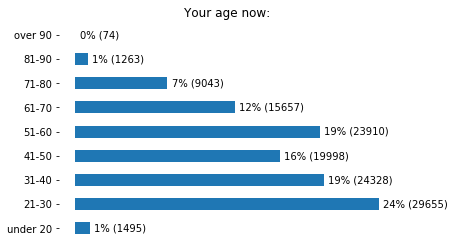

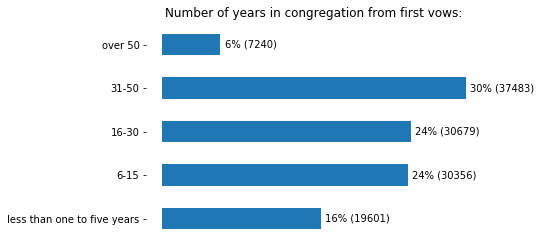

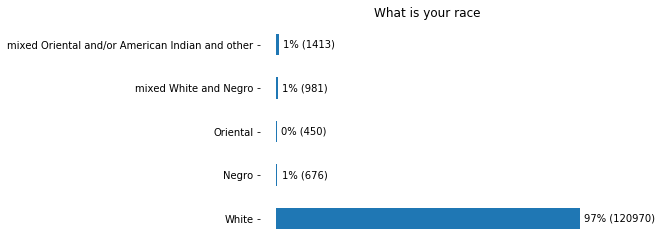

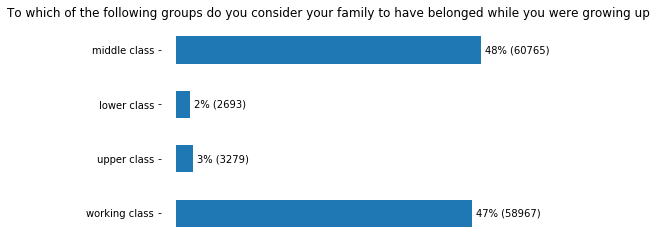

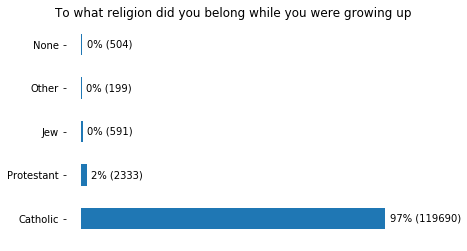

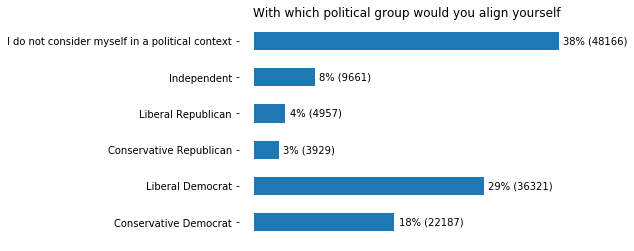

In [7]:
demographic_questions = ['v181', 'v182', 'v183', 'v189', 'v211', 'v245']
bar_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'm', 'indigo']

for i, question in enumerate(demographic_questions):
    responses = survey[question].value_counts().sort_index()
    labels = survey_key[question]['answers'].values()
    title = survey_key[question]['text']
    
    plt.figure()
    ax = responses.plot(kind='barh', title=title)
    ax.set_yticklabels(labels)
    ax.set_xticklabels([])
    ax.tick_params(bottom='off')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

    for j, count in enumerate(responses):
        pct = float(count / responses.sum()) * 100
        pct = round(pct)
        ax.bar(count,j,facecolor=bar_colors[j % len(bar_colors)])
        plt.annotate(str(pct) + '% (' + str(count) + ')', xy=(count + responses.max() * 0.014, j), va='center')
        
    plt.show()